# Maximizing a Pool Break


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from vpython import *
import copy

g = 9.81
mass = 0.17
coeffRes = 0.95
coeffFric = 0.1
fricThreshold = 0.06
tableLength = 2.84
tableWidth = 1.42
pocketRad = 0.07
breakSpeed = 12
ballRad = 0.0572
triangleInit = vec(0,tableLength/4,0)

#pocket positions
TL = vec(-tableWidth/2,tableLength/2,0)
TR = vec(tableWidth/2,tableLength/2,0)
ML = vec(-tableWidth/2,0,0)
MR = vec(tableWidth/2,0,0)
BL = vec(-tableWidth/2,-tableLength/2,0)
BR = vec(tableWidth/2,-tableLength/2,0)

pockets = [TL,TR,ML,MR,BL,BR]

pos0x  = []
pos1x  = []
pos2x  = []
pos3x  = []
pos4x  = []
pos5x  = []
pos6x  = []
pos7x  = []
pos8x  = []
pos9x  = []
pos10x = []
pos11x = []
pos12x = []
pos13x = []
pos14x = []
pos15x = []
pos0y  = []
pos1y  = []
pos2y  = []
pos3y  = []
pos4y  = []
pos5y  = []
pos6y  = []
pos7y  = []
pos8y  = []
pos9y  = []
pos10y = []
pos11y = []
pos12y = []
pos13y = []
pos14y = []
pos15y = []
posData = [pos0x,pos1x,pos2x,pos3x,pos4x,pos5x,pos6x,pos7x,pos8x,pos9x,pos10x,pos11x,pos12x,pos13x,pos14x,pos15x,
           pos0y,pos1y,pos2y,pos3y,pos4y,pos5y,pos6y,pos7y,pos8y,pos9y,pos10y,pos11y,pos12y,pos13y,pos14y,pos15y]
pos = []
vel = np.full(16,vec(0,0,0))

#returns whether a ball is in a pocket    
def pocketed(pos):     
    for i in range(len(pockets)):
        if(mag(pos - pockets[i]) < pocketRad):
            #print("pocketed")
            return True
    return False

#run simulation
def simBreak(x,y,theta):
    
    #clear data
    for a in posData:
        a.clear()
        
    pocketCount = 0
    ballsPocketed = []
    pos.append(vec(x,y,0))
    posData[0].append(x)
    posData[16].append(y)
    vel[0] = vec(breakSpeed*cos(theta),breakSpeed*sin(theta),0)
    current = copy.deepcopy(triangleInit)
    count = 1

    #rack triangle
    for i in range(5):
        for j in range(i+1):
            x = current.x + 2*j*ballRad
            y = current.y
            pos.append(vec(x,y,0))
            posData[count].append(x)
            posData[count+16].append(y)
            count += 1
        current.x -= ballRad
        current.y += 2*ballRad
    
    t = 0
    dt = 0.0001
    while t < 10:
        #check if black or white ball is pocketed
        if(0 in ballsPocketed or 5 in ballsPocketed):
            pocketCount = -1
            break
        for i in range(16):
            ballPos = pos[i]
            #check if current ball is pocketed
            if(i in ballsPocketed):
                continue
            elif(pocketed(ballPos)):
                pocketCount += 1
                ballsPocketed.append(i)
                pos[i] = vec(100*i,100*i,100*i)
                continue
                
            #check wall collision
            if(ballPos.x - ballRad < -tableWidth/2):
                vel[i].x *= -coeffRes
            elif(ballPos.x + ballRad > tableWidth/2):
                vel[i].x *= -coeffRes
            elif(ballPos.y - ballRad < -tableLength/2):
                vel[i].y *= -coeffRes
            elif(ballPos.y + ballRad > tableLength/2):
                vel[i].y *= -coeffRes
                
            #check ball collision
            for j in range(i+1,16):
                ballPos2 = pos[j]
                if(mag(ballPos - ballPos2) < 2*ballRad):
                    vDiff = vel[i] - vel[j]
                    xDiff = ballPos - ballPos2
                    vel[i] -= coeffRes*(dot(vDiff,xDiff)/mag2(xDiff))*xDiff
                    vDiff *= -1
                    xDiff *= -1
                    vel[j] -= coeffRes*(dot(vDiff,xDiff)/mag2(xDiff))*xDiff
                    
            #check if stopped
            if(mag(vel[i]) < fricThreshold):
                vel[i] *= 0
            
            #calculate friction
            f = -mass*g*coeffFric*norm(vel[i])
            
            #momentum update
            vel[i] += f/mass * dt
            pos[i] += vel[i] * dt
            posData[i].append(pos[i].x)
            posData[i+16].append(pos[i].y)
        t += dt
    return posData,pocketCount

<IPython.core.display.Javascript object>

In [ ]:
## Generates HeatMaps

IndexError: list index out of range

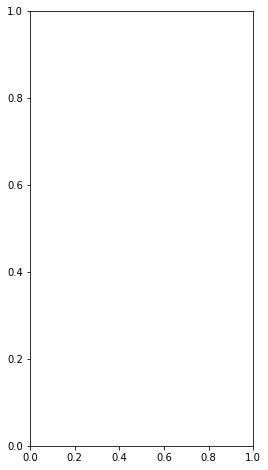

In [11]:
dx = 0.1
dy = 0.1
thetas = [pi/4,pi/3,pi/2,2*pi/3,3*pi/4]
xPos = np.arange(-tableWidth/2 + ballRad,0,dx)
yPos = np.arange(-tableLength/2 + ballRad,-tableLength/4,dy)
XX,YY = np.meshgrid(xPos,yPos)


colors = "kkkmmmbbbcccgggr"
for i in range(len(thetas)):
    col = []
    fig, ax = plt.subplots(figsize=(4,8))
    plt.title("Heat-Map for \u03F4 = {0}".format(thetas[i]/pi) + "\u03C0")
    plt.ylim(-tableLength/2,tableLength/2) 
    plt.xlim(-tableWidth/2, tableWidth/2)   
    for j in range(len(xPos)):
        for k in range(len(yPos)):
            pd,pc = simBreak(xPos[j],yPos[k],thetas[i]) 
            col.append(colors[pc])
    plt.scatter(XX,YY,c = col)
    plt.show()


## Plots Ball Positions for a Specific Break

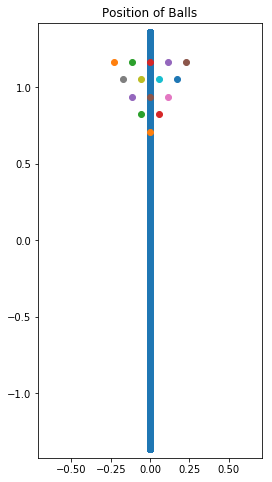

0


In [12]:
p = simBreak(0,-tableLength/4,pi/2)[0]

fig, ax = plt.subplots(figsize=(4,8))
plt.title("Position of Balls")
plt.ylim(-tableLength/2,tableLength/2) 
plt.xlim(-tableWidth/2, tableWidth/2) 
for i in range(16):
    plt.scatter(p[i],p[i+16])

plt.show()